# Data Mining Project using CRISP-DM
## Naive Bayes Model: Sentiment analysis based on customer reviews of Amazon products
<iframe 
  width="560" 
  height="315" 
  src="https://www.youtube.com/embed/RqIC5LwD974" 
  title="YouTube video player" 
  frameborder="0" 
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" 
  referrerpolicy="strict-origin-when-cross-origin" 
  allowfullscreen>
</iframe>

https://youtu.be/RqIC5LwD974 

### CRISP-DM Framework

The following sections are based on the CRISP-DM (Cross Industry Standard Process for Data Mining) framework.
#### 1. Business Understanding

- **Project Objectives:** The objective of this project is to predict the sentiment (positive/negative) of Amazon product reviews using a Naive Bayes classifier. This will allow product teams and sellers to quickly gauge customer satisfaction and identify trends in user feedback.

- **Background:** 
On Amazon, customer reviews play a crucial role in influencing purchasing decisions. However, manually analyzing thousands of product reviews is inefficient. By automating sentiment analysis, sellers and businesses can instantly identify customer sentiment, spot recurring issues, and improve product offerings based on feedback.

- **Success Criteria:** 
    - Achieve high classification accuracy (e.g., >80%).
    Develop a model that can be easily interpreted by product teams or marketers who may not have technical expertise.

- **Stakeholders:**
    - Amazon Sellers/Business Owners: Interested in monitoring customer sentiment to improve products and address any negative feedback.

    - Marketing Teams: Focus on tracking customer satisfaction and identifying trends in feedback for better customer engagement.

    - Data Analysts/Developers: Responsible for deploying, tuning, and maintaining the sentiment classification model.

- **Constraints:**
    - Text data may contain non-standard language  
    - The model must be explainable to non-technical users  
    - Limited computational resources for real-time prediction
#### 2. Data Understanding
We utilize the English reviews on Amazon items and FR translation dataset, which contains English-language Amazon product reviews along with their French translations.
https://www.kaggle.com/datasets/dargolex/english-reviews-on-amazon-items-and-fr-translation

- **Data Collection:** 
This dataset is publicly available on Kaggle and was compiled to support sentiment analysis tasks. It includes English reviews of various Amazon products and their corresponding French translations.

- **Data Description:** 
    - review_body: The text content of the English review.
    - review_translation: The French translation of the review.
    - star_rating: The rating given by the reviewer, typically ranging from 1 to 5 stars.
    - product_category: The category of the product being reviewed.

- **Initial Exploration:**
The relative distribution of all rating types, meaning that the ratings are evenly distributed 

```
rating
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64
```
The word cloud gives a good idea if certain words are more common than others
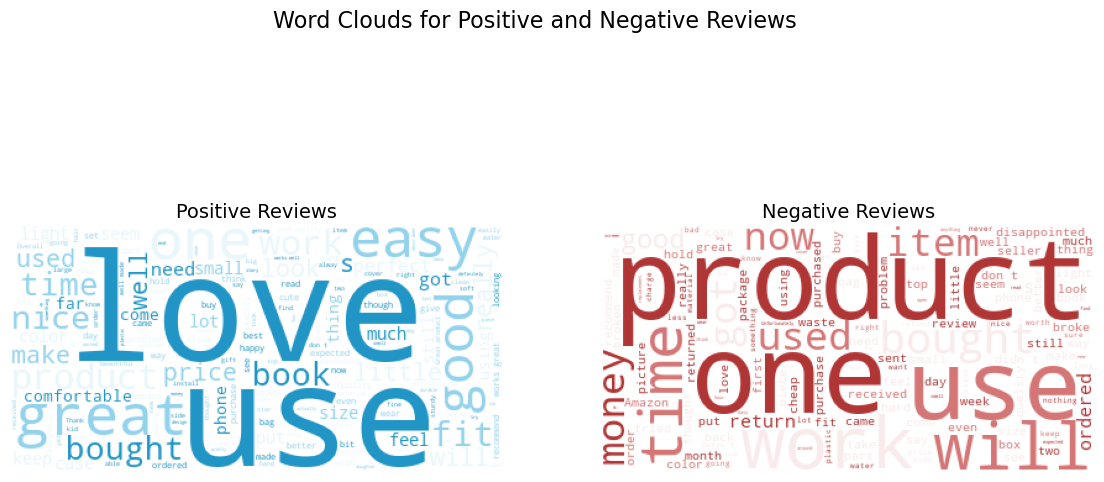


For the analysis, the French translation is not needed. So this column is not needed to for this analysis.
#### 3. Data Preparation

- **Data Cleaning:** The column with the French translation is removed, as this information is not needed for this model
- **Feature Engineering:** A new column was created for a binomial distribution of the reviews for a better accuracy of the model. This column classifies the reviews into 'positive' or 'negative', based on the score column; numbers 1-2 are classified negative; 4-5 are classified positive.
The neutral comments (score: 3) were not used as these reviews had a negative influence on the accuracy of the model. 
#### 4. Modeling

- **Model Selection:** The naive bayes model was used because of efficiency it has with text data. Also the model works well with relatively large data sets and is fast to train, and efficient.
- **Parameter Tuning:** I tried to tune the parameter (alpha) with the use of cross validation and gridsearch, it resulted in a 0.01% change in accuracy.
- **Training & Validation:** I tried to split the data in multiple different splits, were the 80/20 split gave me the best results based on accuracy (eventhough the difference was small).


#### Questions to Consider:
- Which evaluation metrics were used to assess model performance?

The model was primarily evaluated using accuracy during grid search. However, for a more comprehensive performance analysis, I also examined the confusion matrix, precision, recall, and F1-score on the test set after training the final model. These additional metrics help assess how well the model performs across individual classes and whether it handles false positives/negatives effectively.


```
Best alpha: 0.9
Model Accuracy:  0.8493541666666666
[[20267  3673]
 [ 3558 20502]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     23940
    positive       0.85      0.85      0.85     24060

    accuracy                           0.85     48000
   macro avg       0.85      0.85      0.85     48000
weighted avg       0.85      0.85      0.85     48000
```



### 5. Evaluation

- **Performance Metrics:** 
```
Best alpha: 0.9
Model Accuracy:  0.8493541666666666
[[20267  3673]
 [ 3558 20502]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     23940
    positive       0.85      0.85      0.85     24060

    accuracy                           0.85     48000
   macro avg       0.85      0.85      0.85     48000
weighted avg       0.85      0.85      0.85     48000
```

- **Model Interpretability:** 
the model uses the 3000 most frequent words to calculate the probability that a review is either positive or negative based on the frequency of those words.

- **Comparison with Baseline:** 
The baseline model assumes predictions made at random, based on the class distribution in the dataset. Since the proportions for negative and positive sentiments are both 0.4, and neutral is 0.2, the highest baseline accuracy we can achieve by always predicting the majority class (either negative or positive) is 40%.

In comparison, my Naive Bayes model achieved an accuracy of 84,93%, which is significantly better than the baseline. This indicates that the model is effectively learning patterns in the data rather than making random or uniform predictions.

#### Questions to Consider:
- What are the strengths and weaknesses of your approach?
    Strenghts
Easy to understand model 
Fast to train 

    Weaknesses
relies on independence of words, which may not be the case in all natural language
can't determine sarcasm or slang
new terms (terms not in the original data set) may be misclassified

- Are there any biases or limitations in your model?
The model is created based on training data, so it might not perform the same on new data. It relies on the amount of data input how well it does in performing on new data
### 6. Deployment

- **Deployment Strategy:** 
The model can be used for for sentiment predictions on new products and thus wether customer are satisfied with there products. This could help with choosing the right type of product businesses could be offering to their customers. 
It could be deployed as a simple backend service (integrated into a web platform) where user feedback is collected.

- **Monitoring:** 
Performance could be measured by
    - logging predictions and compare them with actual feedback over time 
    - monitor the accuracy and retrain the model (if necassary) based on language changes

- **Future Work:** 
    - Expand the model so it could be used for multiple languages 
    - Expand the quantification by introducing how positive or negative a review is (sentiment scoring)
